In [10]:
import pandas as pd
import numpy as np

### 1. ETL (Extract, Transform, Load) Process

In [16]:
equipment_data = pd.read_csv('equipment_data.csv')
leads_data = pd.read_csv('leads_data.csv')
users_data = pd.read_csv('users_data.csv')

In [17]:
print("Equipment Data:")
print(equipment_data.head())
print("\nLeads Data:")
print(leads_data.head())
print("\nUsers Data:")
print(users_data.head())

Equipment Data:
   Equipment ID Equipment Type Date Onboarded         City
0             1      Bulldozer     21-01-2021      Phoenix
1             2      Excavator     03-06-2023      Chicago
2             3      Bulldozer     25-04-2021      Chicago
3             4      Excavator     11-02-2021  Los Angeles
4             5         Loader     16-06-2022      Phoenix

Leads Data:
   Lead ID  Equipment ID  User ID Date of Lead     City
0        1           176      833   31-05-2020  Phoenix
1        2           330      736   05-10-2021  Phoenix
2        3           211      926   17-09-2021  Chicago
3        4           184      264   04-08-2020  Chicago
4        5            95      661   14-07-2020  Phoenix

Users Data:
   User ID User Type Date Joined         City
0        1  Operator  11-09-2020      Chicago
1        2  Customer  23-07-2021      Chicago
2        3  Operator  21-04-2020  Los Angeles
3        4  Customer  11-09-2022      Houston
4        5  Mechanic  29-08-2023      

In [18]:
equipment_data.head()

,Equipment ID,Equipment Type,Date Onboarded,City
0,1,Bulldozer,21-01-2021,Phoenix
1,2,Excavator,03-06-2023,Chicago
2,3,Bulldozer,25-04-2021,Chicago
3,4,Excavator,11-02-2021,Los Angeles
4,5,Loader,16-06-2022,Phoenix


In [20]:
equipment_data['Date Onboarded'] = pd.to_datetime(equipment_data['Date Onboarded'], format='%d-%m-%Y')
leads_data['Date of Lead'] = pd.to_datetime(leads_data['Date of Lead'], format='%d-%m-%Y')
users_data['Date Joined'] = pd.to_datetime(users_data['Date Joined'], format='%d-%m-%Y')

print("Missing Values in Equipment Data:")
print(equipment_data.isnull().sum())
print("\nMissing Values in Leads Data:")
print(leads_data.isnull().sum())
print("\nMissing Values in Users Data:")
print(users_data.isnull().sum())

Missing Values in Equipment Data:
Equipment ID      0
Equipment Type    0
Date Onboarded    0
City              0
dtype: int64

Missing Values in Leads Data:
Lead ID         0
Equipment ID    0
User ID         0
Date of Lead    0
City            0
dtype: int64

Missing Values in Users Data:
User ID        0
User Type      0
Date Joined    0
City           0
dtype: int64


In [21]:
users_yearly = users_data.groupby(users_data['Date Joined'].dt.year).size().reset_index(name='New Users')
users_monthly = users_data.groupby(users_data['Date Joined'].dt.to_period("M")).size().reset_index(name='New Users')

equipment_yearly = equipment_data.groupby(equipment_data['Date Onboarded'].dt.year).size().reset_index(name='New Equipment')
equipment_quarterly = equipment_data.groupby(equipment_data['Date Onboarded'].dt.to_period("Q")).size().reset_index(name='New Equipment')

print("Yearly New Users:")
print(users_yearly)
print("\nMonthly New Users:")
print(users_monthly.head())
print("\nYearly New Equipment:")
print(equipment_yearly)
print("\nQuarterly New Equipment:")
print(equipment_quarterly.head())

Yearly New Users:
   Date Joined  New Users
0         2020        239
1         2021        237
2         2022        273
3         2023        251

Monthly New Users:
  Date Joined  New Users
0     2020-01         18
1     2020-02         16
2     2020-03         18
3     2020-04         24
4     2020-05         17

Yearly New Equipment:
   Date Onboarded  New Equipment
0            2020            111
1            2021            138
2            2022            132
3            2023            119

Quarterly New Equipment:
  Date Onboarded  New Equipment
0         2020Q1             28
1         2020Q2             23
2         2020Q3             30
3         2020Q4             30
4         2021Q1             34


In [22]:
print("Yearly New Users:")
users_yearly

Yearly New Users:


,Date Joined,New Users
0,2020,239
1,2021,237
2,2022,273
3,2023,251


In [109]:
total_leads_per_year = leads_data.groupby(leads_data['Date of Lead'].dt.year).size()
total_equipment_per_year = equipment_data.groupby(equipment_data['Date Onboarded'].dt.year).size()

lead_conversion_rate = (total_leads_per_year / total_equipment_per_year) * 100

print("Lead Conversion Rate per Year:")
print(lead_conversion_rate)

Lead Conversion Rate per Year:
Date of Lead
2020    315.315315
2021    251.449275
2022    307.575758
2023    333.613445
dtype: float64


In [25]:
users_yearly.to_csv('transformed_users_yearly.csv', index=False)
users_monthly.to_csv('transformed_users_monthly.csv', index=False)

equipment_yearly.to_csv('transformed_equipment_yearly.csv', index=False)
equipment_quarterly.to_csv('transformed_equipment_quarterly.csv', index=False)

lead_conversion_rate.to_csv('lead_conversion_rate.csv', index=True)

### 2. Descriptive and Aggregate Analysis

In [26]:
user_type_counts = users_data['User Type'].value_counts()

print("Total Number of Each User Type:")
print(user_type_counts)

Total Number of Each User Type:
Operator    336
Mechanic    334
Customer    330
Name: User Type, dtype: int64


In [27]:
users_per_year = users_data.groupby(users_data['Date Joined'].dt.year).size()

print("Number of Users Joined Each Year:")
print(users_per_year)

Number of Users Joined Each Year:
Date Joined
2020    239
2021    237
2022    273
2023    251
dtype: int64


In [28]:
from datetime import datetime, timedelta
three_weeks_ago = datetime.now() - timedelta(weeks=3)

new_users_last_3_weeks = users_data[users_data['Date Joined'] >= three_weeks_ago].shape[0]

print(f"Number of New Users in the Last 3 Weeks: {new_users_last_3_weeks}")

Number of New Users in the Last 3 Weeks: 0


In [29]:
equipment_per_year = equipment_data.groupby(equipment_data['Date Onboarded'].dt.year).size()

print("Total Number of Equipment Onboarded Each Year:")
print(equipment_per_year)

Total Number of Equipment Onboarded Each Year:
Date Onboarded
2020    111
2021    138
2022    132
2023    119
dtype: int64


In [ ]:
# Equipment Leads in the Last Month by City and User Type

In [30]:
print(leads_data.columns)

Index(['Lead ID', 'Equipment ID', 'User ID', 'Date of Lead', 'City'], dtype='object')


In [ ]:
# Step 1: Merge leads_data with users_data

In [31]:
leads_with_user_type = pd.merge(leads_data, users_data[['User ID', 'User Type']], how='left', on='User ID')

print(leads_with_user_type.head())

   Lead ID  Equipment ID  User ID Date of Lead     City User Type
0        1           176      833   2020-05-31  Phoenix  Operator
1        2           330      736   2021-10-05  Phoenix  Mechanic
2        3           211      926   2021-09-17  Chicago  Customer
3        4           184      264   2020-08-04  Chicago  Operator
4        5            95      661   2020-07-14  Phoenix  Customer


In [ ]:
# Step 2: Group by City and User Type

In [41]:
from datetime import datetime

leads_data['Date of Lead'] = pd.to_datetime(leads_data['Date of Lead'])

leads_2023 = leads_data[leads_data['Date of Lead'].dt.year == 2023]

recent_leads = leads_2023.sort_values(by='Date of Lead', ascending=False)
print(recent_leads.head(10))

      Lead ID  Equipment ID  User ID Date of Lead         City
572       573           135      422   2023-12-30      Chicago
557       558           196      854   2023-12-29      Phoenix
31         32            20       81   2023-12-29     New York
498       499           415      255   2023-12-26  Los Angeles
1344     1345            15      330   2023-12-24      Houston
1247     1248           258      595   2023-12-23      Chicago
373       374           187      809   2023-12-23      Houston
1002     1003           392      375   2023-12-23      Houston
1103     1104           373      376   2023-12-22  Los Angeles
711       712           195      663   2023-12-22  Los Angeles


In [42]:
recent_leads.head(10)

,Lead ID,Equipment ID,User ID,Date of Lead,City
572,573,135,422,2023-12-30,Chicago
557,558,196,854,2023-12-29,Phoenix
31,32,20,81,2023-12-29,New York
498,499,415,255,2023-12-26,Los Angeles
1344,1345,15,330,2023-12-24,Houston
1247,1248,258,595,2023-12-23,Chicago
373,374,187,809,2023-12-23,Houston
1002,1003,392,375,2023-12-23,Houston
1103,1104,373,376,2023-12-22,Los Angeles
711,712,195,663,2023-12-22,Los Angeles


In [45]:
leads_data = leads_data.merge(users_data[['User ID', 'User Type']], on='User ID', how='left')

leads_data['Date of Lead'] = pd.to_datetime(leads_data['Date of Lead'])

leads_2023 = leads_data[leads_data['Date of Lead'].dt.year == 2023]

recent_leads = leads_2023.sort_values(by='Date of Lead', ascending=False)

last_month_of_data = recent_leads['Date of Lead'].max() - timedelta(weeks=4)

leads_last_month = recent_leads[recent_leads['Date of Lead'] >= last_month_of_data]

leads_by_city_user = leads_last_month.groupby(['City', 'User Type']).size().reset_index(name='Lead Count')

print("Equipment Leads in the Last Month by City and User Type:")
print(leads_by_city_user)

Equipment Leads in the Last Month by City and User Type:
           City User Type  Lead Count
0       Chicago  Customer           3
1       Chicago  Mechanic           3
2       Houston  Customer           2
3       Houston  Mechanic           8
4       Houston  Operator           3
5   Los Angeles  Customer           2
6   Los Angeles  Mechanic           2
7   Los Angeles  Operator           4
8      New York  Customer           3
9      New York  Operator           1
10      Phoenix  Customer           3
11      Phoenix  Mechanic           4


In [46]:
leads_by_city_user

,City,User Type,Lead Count
0,Chicago,Customer,3
1,Chicago,Mechanic,3
2,Houston,Customer,2
3,Houston,Mechanic,8
4,Houston,Operator,3
5,Los Angeles,Customer,2
6,Los Angeles,Mechanic,2
7,Los Angeles,Operator,4
8,New York,Customer,3
9,New York,Operator,1


## 3. Time Series Analysis

In [ ]:
# Time series analysis to identify trends in user sign-ups and equipment onboarding.
# Aggregate User Sign-ups

In [50]:
print(users_data.columns)

Index(['User ID', 'User Type', 'Date Joined', 'City'], dtype='object')


In [55]:
users_data['Date Joined'] = pd.to_datetime(users_data['Date Joined'])

monthly_users = users_data.resample('M', on='Date Joined').size().reset_index(name='User Sign-Ups')

quarterly_users = users_data.resample('Q', on='Date Joined').size().reset_index(name='User Sign-Ups')

print("Monthly User Sign-Ups:")
print(monthly_users.head())

print("Quarterly User Sign-Ups:")
print(quarterly_users.head())

Monthly User Sign-Ups:
  Date Joined  User Sign-Ups
0  2020-01-31             18
1  2020-02-29             16
2  2020-03-31             18
3  2020-04-30             24
4  2020-05-31             17
Quarterly User Sign-Ups:
  Date Joined  User Sign-Ups
0  2020-03-31             52
1  2020-06-30             58
2  2020-09-30             78
3  2020-12-31             51
4  2021-03-31             65


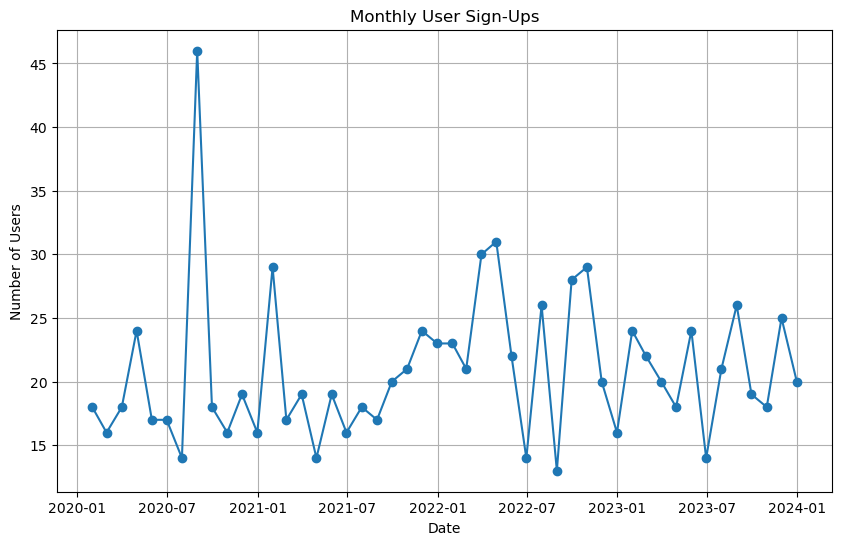

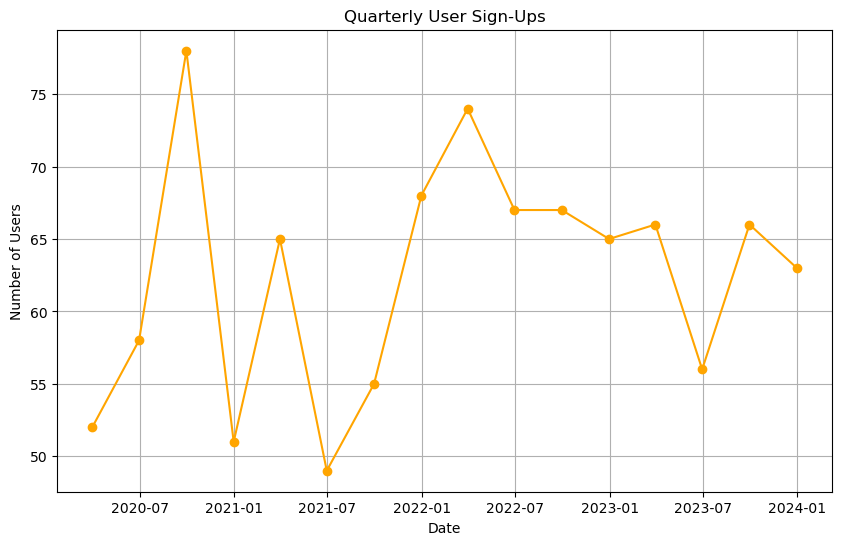

In [53]:
import matplotlib.pyplot as plt

users_data['Date Joined'] = pd.to_datetime(users_data['Date Joined'])

monthly_users = users_data.resample('M', on='Date Joined').size().reset_index(name='User Sign-Ups')

quarterly_users = users_data.resample('Q', on='Date Joined').size().reset_index(name='User Sign-Ups')

plt.figure(figsize=(10, 6))
plt.plot(monthly_users['Date Joined'], monthly_users['User Sign-Ups'], marker='o')
plt.title('Monthly User Sign-Ups')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_users['Date Joined'], quarterly_users['User Sign-Ups'], marker='o', color='orange')
plt.title('Quarterly User Sign-Ups')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [ ]:
# Aggregate Equipment Onboarding Data

In [57]:
equipment_data['Date Onboarded'] = pd.to_datetime(equipment_data['Date Onboarded'])

monthly_equipment = equipment_data.resample('M', on='Date Onboarded').size().reset_index(name='Equipment Onboarded')

quarterly_equipment = equipment_data.resample('Q', on='Date Onboarded').size().reset_index(name='Equipment Onboarded')

print("Monthly Equipment Onboardings:")
print(monthly_equipment.head())

print("Quarterly Equipment Onboardings:")
print(quarterly_equipment.head())

Monthly Equipment Onboardings:
  Date Onboarded  Equipment Onboarded
0     2020-01-31                   10
1     2020-02-29                    6
2     2020-03-31                   12
3     2020-04-30                    4
4     2020-05-31                    6
Quarterly Equipment Onboardings:
  Date Onboarded  Equipment Onboarded
0     2020-03-31                   28
1     2020-06-30                   23
2     2020-09-30                   30
3     2020-12-31                   30
4     2021-03-31                   34


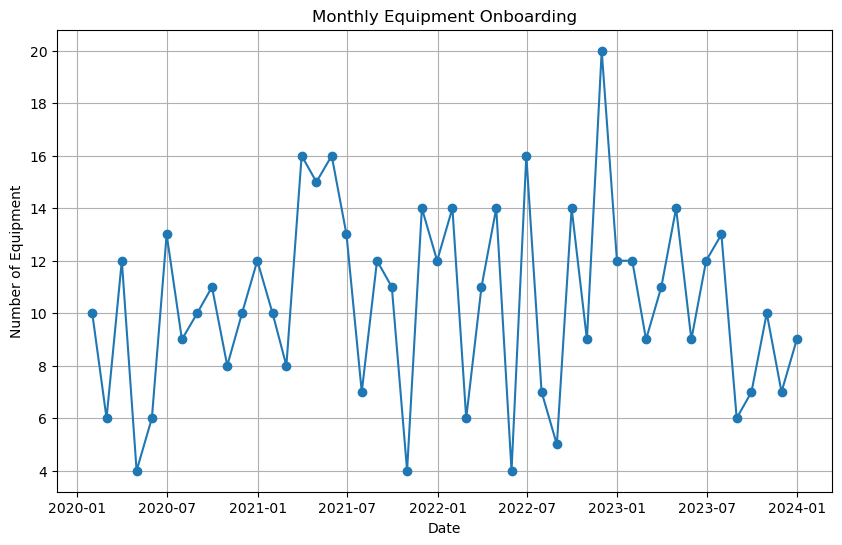

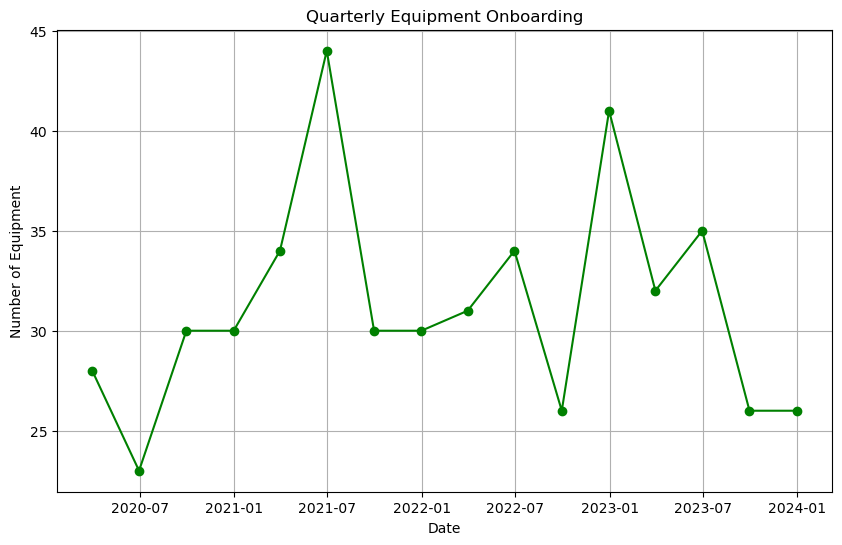

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_equipment['Date Onboarded'], monthly_equipment['Equipment Onboarded'], marker='o')
plt.title('Monthly Equipment Onboarding')
plt.xlabel('Date')
plt.ylabel('Number of Equipment')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(quarterly_equipment['Date Onboarded'], quarterly_equipment['Equipment Onboarded'], marker='o', color='green')
plt.title('Quarterly Equipment Onboarding')
plt.xlabel('Date')
plt.ylabel('Number of Equipment')
plt.grid(True)
plt.show()

In [ ]:
# Analyze Seasonality Effects if any

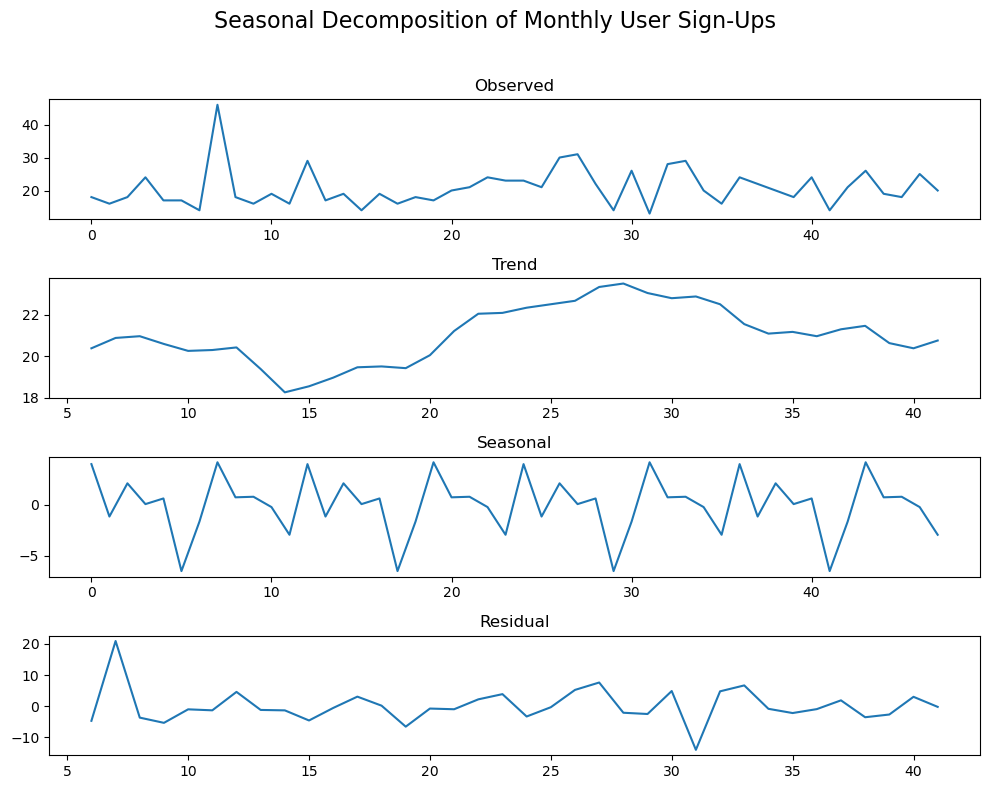

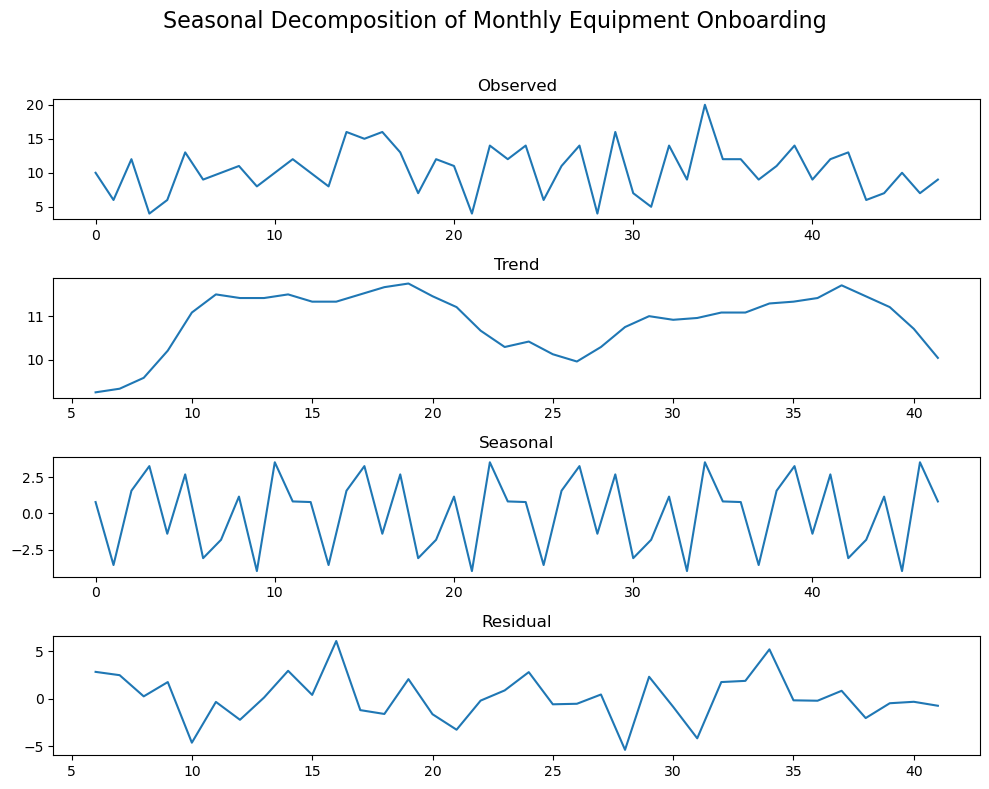

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

user_signups_decomposition = seasonal_decompose(monthly_users['User Sign-Ups'], model='additive', period=12)

fig_user, axes_user = plt.subplots(4, 1, figsize=(10, 8))
user_signups_decomposition.observed.plot(ax=axes_user[0], title='Observed')
user_signups_decomposition.trend.plot(ax=axes_user[1], title='Trend')
user_signups_decomposition.seasonal.plot(ax=axes_user[2], title='Seasonal')
user_signups_decomposition.resid.plot(ax=axes_user[3], title='Residual')

fig_user.suptitle('Seasonal Decomposition of Monthly User Sign-Ups', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

equipment_onboarding_decomposition = seasonal_decompose(monthly_equipment['Equipment Onboarded'], model='additive', period=12)

fig_equipment, axes_equipment = plt.subplots(4, 1, figsize=(10, 8))
equipment_onboarding_decomposition.observed.plot(ax=axes_equipment[0], title='Observed')
equipment_onboarding_decomposition.trend.plot(ax=axes_equipment[1], title='Trend')
equipment_onboarding_decomposition.seasonal.plot(ax=axes_equipment[2], title='Seasonal')
equipment_onboarding_decomposition.resid.plot(ax=axes_equipment[3], title='Residual')

fig_equipment.suptitle('Seasonal Decomposition of Monthly Equipment Onboarding', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 4. Visualizations

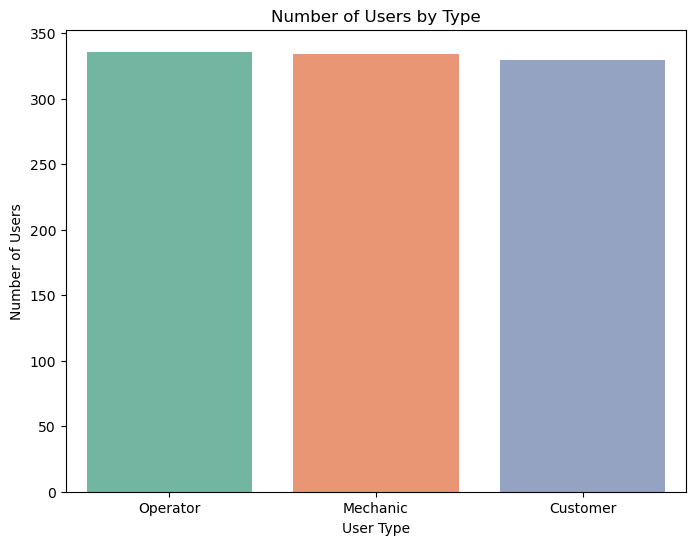

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

user_type_counts = users_data['User Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='Set2')
plt.title('Number of Users by Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

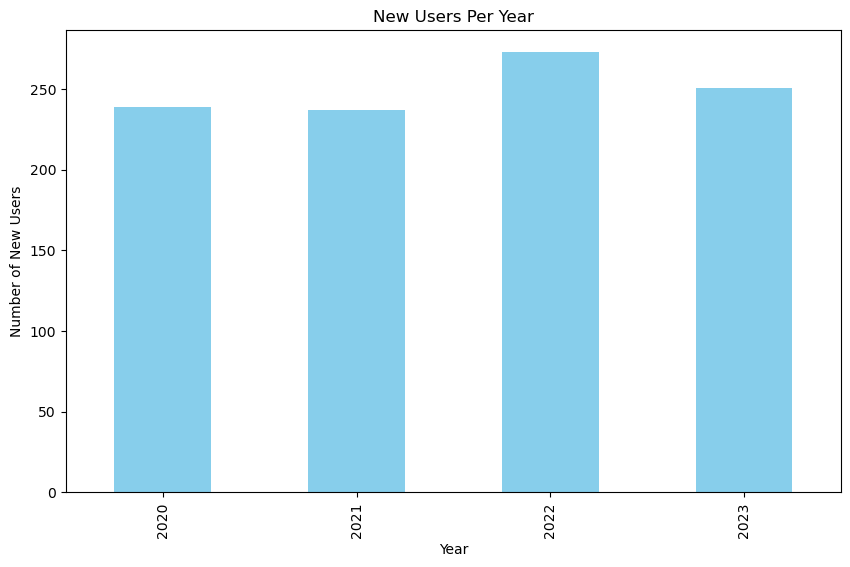

In [74]:
users_data['Year Joined'] = users_data['Date Joined'].dt.year

new_users_per_year = users_data['Year Joined'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
new_users_per_year.plot(kind='bar', color='skyblue')
plt.title('New Users Per Year')
plt.xlabel('Year')
plt.ylabel('Number of New Users')
plt.show()

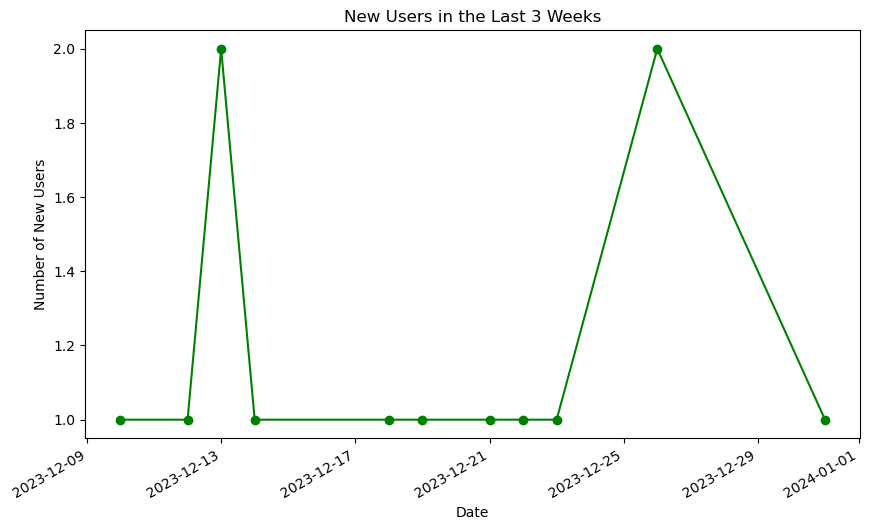

In [75]:
from datetime import timedelta

three_weeks_ago = users_data['Date Joined'].max() - timedelta(weeks=3)

new_users_last_3_weeks = users_data[users_data['Date Joined'] >= three_weeks_ago]

new_users_daily = new_users_last_3_weeks['Date Joined'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
new_users_daily.plot(kind='line', marker='o', color='green')
plt.title('New Users in the Last 3 Weeks')
plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.show()

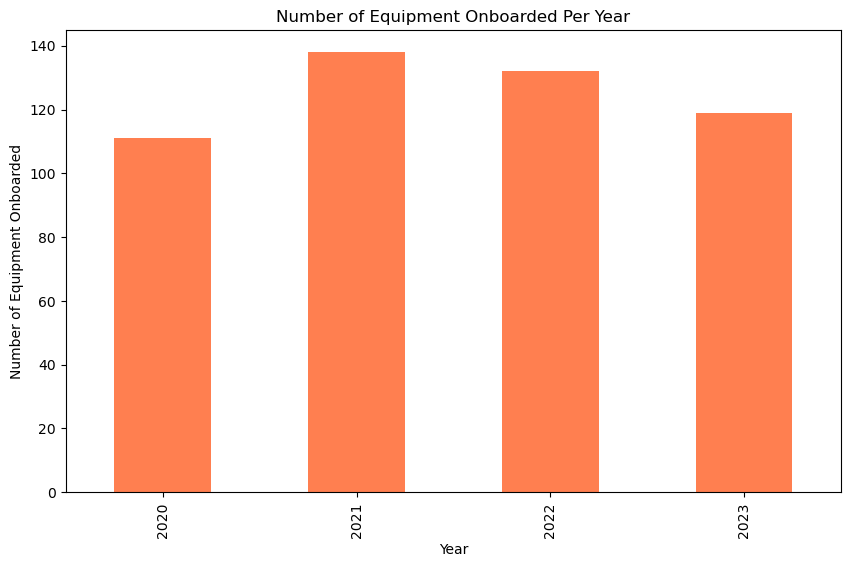

In [87]:
equipment_data['Year Onboarded'] = equipment_data['Date Onboarded'].dt.year

equipment_per_year = equipment_data['Year Onboarded'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
equipment_per_year.plot(kind='bar', color='coral')
plt.title('Number of Equipment Onboarded Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Equipment Onboarded')
plt.show()

C:\Users\Monu\AppData\Local\Temp\ipykernel_1976\2400912277.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  leads_pivot = leads_by_city_user.pivot('City', 'User Type', 'Lead Count')


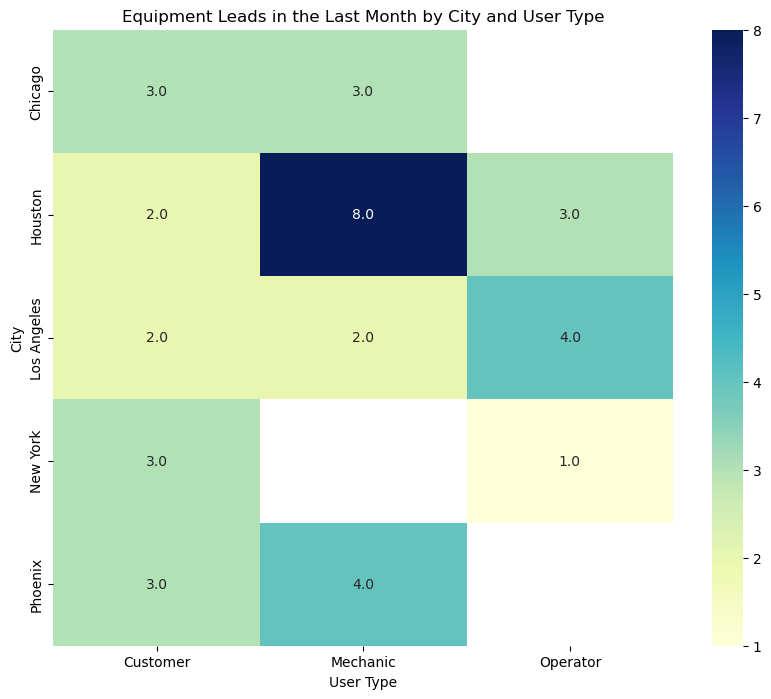

In [106]:
import seaborn as sns

leads_by_city_user = leads_last_month.groupby(['City', 'User Type']).size().reset_index(name='Lead Count')

leads_pivot = leads_by_city_user.pivot('City', 'User Type', 'Lead Count')

plt.figure(figsize=(10, 8))
sns.heatmap(leads_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Equipment Leads in the Last Month by City and User Type')
plt.xlabel('User Type')
plt.ylabel('City')
plt.show()

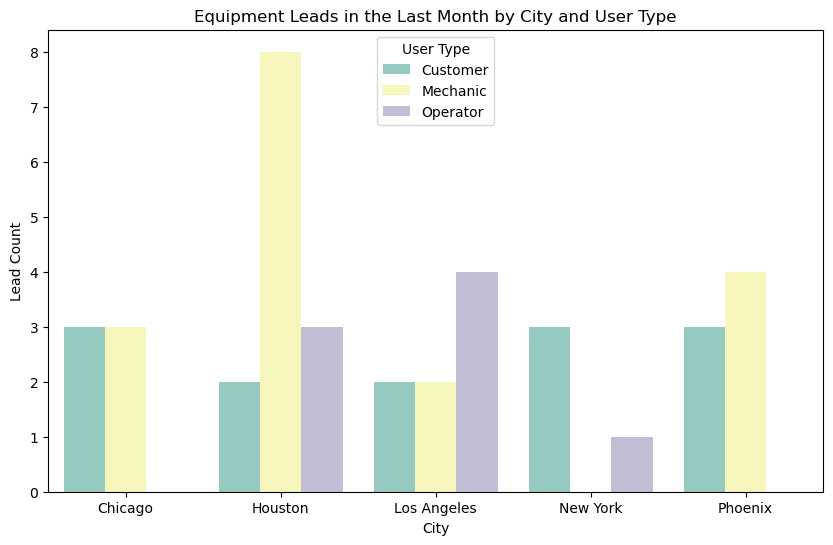

In [107]:
# Alternatively, you can use a bar chart

plt.figure(figsize=(10, 6))
sns.barplot(data=leads_by_city_user, x='City', y='Lead Count', hue='User Type', palette='Set3')
plt.title('Equipment Leads in the Last Month by City and User Type')
plt.xlabel('City')
plt.ylabel('Lead Count')
plt.show()

## 5. Advanced Analysis and Anomalies Detection

In [ ]:
# Comparative Analysis Between Cities

In [90]:
user_signups_by_city = users_data.groupby('City').size().reset_index(name='User Sign-Ups')
equipment_leads_by_city = leads_data.groupby('City').size().reset_index(name='Equipment Leads')

city_activity = pd.merge(user_signups_by_city, equipment_leads_by_city, on='City', how='outer').fillna(0)

city_activity['Total Activity'] = city_activity['User Sign-Ups'] + city_activity['Equipment Leads']
city_activity = city_activity.sort_values(by='Total Activity', ascending=False)

print("City Activity Analysis:")
city_activity

City Activity Analysis:


,City,User Sign-Ups,Equipment Leads,Total Activity
2,Los Angeles,213,312,525
1,Houston,191,317,508
3,New York,225,277,502
4,Phoenix,190,303,493
0,Chicago,181,291,472


In [ ]:
# Anomaly Detection in User Sign-Ups and Equipment Leads
# Using Z-Scores for Anomaly Detection:

In [91]:
from scipy.stats import zscore

city_activity['User Sign-Ups Z-Score'] = zscore(city_activity['User Sign-Ups'])
city_activity['Equipment Leads Z-Score'] = zscore(city_activity['Equipment Leads'])

# Identify anomalies (Z-score > 2 or < -2)
user_signups_anomalies = city_activity[abs(city_activity['User Sign-Ups Z-Score']) > 2]
equipment_leads_anomalies = city_activity[abs(city_activity['Equipment Leads Z-Score']) > 2]

print("\nUser Sign-Ups Anomalies:")
print(user_signups_anomalies)

print("\nEquipment Leads Anomalies:")
print(equipment_leads_anomalies)


User Sign-Ups Anomalies:
Empty DataFrame
Columns: [City, User Sign-Ups, Equipment Leads, Total Activity, User Sign-Ups Z-Score, Equipment Leads Z-Score]
Index: []

Equipment Leads Anomalies:
Empty DataFrame
Columns: [City, User Sign-Ups, Equipment Leads, Total Activity, User Sign-Ups Z-Score, Equipment Leads Z-Score]
Index: []


In [95]:
from scipy.stats import zscore

city_activity['User Sign-Ups Z-Score'] = zscore(city_activity['User Sign-Ups'])
city_activity['Equipment Leads Z-Score'] = zscore(city_activity['Equipment Leads'])

# Identify anomalies with a lower Z-score threshold (Z-score > 1.5 or < -1.5)
user_signups_anomalies = city_activity[abs(city_activity['User Sign-Ups Z-Score']) > 1.5]
equipment_leads_anomalies = city_activity[abs(city_activity['Equipment Leads Z-Score']) > 1.5]

print("\nUser Sign-Ups Anomalies with Z-Score threshold of 1.5:")
print(user_signups_anomalies)

print("\nEquipment Leads Anomalies with Z-Score threshold of 1.5:")
print(equipment_leads_anomalies)


User Sign-Ups Anomalies with Z-Score threshold of 1.5:
       City  User Sign-Ups  Equipment Leads  Total Activity  \
3  New York            225              277             502   

   User Sign-Ups Z-Score  Equipment Leads Z-Score  
3               1.529402                -1.585641  

Equipment Leads Anomalies with Z-Score threshold of 1.5:
       City  User Sign-Ups  Equipment Leads  Total Activity  \
3  New York            225              277             502   

   User Sign-Ups Z-Score  Equipment Leads Z-Score  
3               1.529402                -1.585641  


In [96]:
print("\nUser Sign-Ups Anomalies with Z-Score threshold of 1.5:")
user_signups_anomalies

print("\nEquipment Leads Anomalies with Z-Score threshold of 1.5:")
equipment_leads_anomalies


User Sign-Ups Anomalies with Z-Score threshold of 1.5:

Equipment Leads Anomalies with Z-Score threshold of 1.5:


,City,User Sign-Ups,Equipment Leads,Total Activity,User Sign-Ups Z-Score,Equipment Leads Z-Score
3,New York,225,277,502,1.529402,-1.585641


In [ ]:
# VISUAL INSPECTION

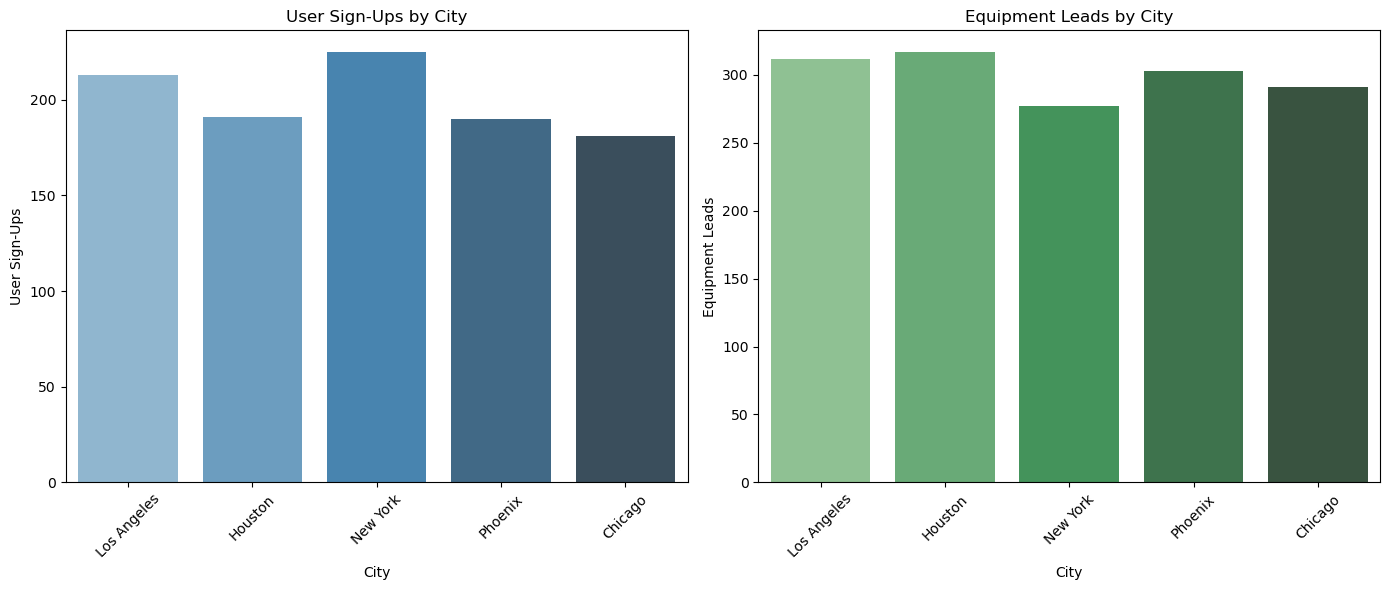

In [97]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='City', y='User Sign-Ups', data=city_activity, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('User Sign-Ups by City')

plt.subplot(1, 2, 2)
sns.barplot(x='City', y='Equipment Leads', data=city_activity, palette='Greens_d')
plt.xticks(rotation=45)
plt.title('Equipment Leads by City')

plt.tight_layout()
plt.show()

### Possible reasons for these anomalies or patterns.

#### The anomalies or patterns in user sign-ups and equipment leads could be due to:

1. **Economic Factors:** Cities with booming economies or government incentives may see higher activity, while those in downturns may see less.
2. **Seasonal Trends:** Seasonal demand or weather conditions can influence the number of leads.
3. **Marketing Efforts:** Targeted campaigns, local events, or strong brand presence can drive higher sign-ups and leads.
4. **Demographics:** Higher population or industry concentration in certain cities may lead to more activity.
5. **Infrastructure:** Better infrastructure and accessibility can boost leads, while supply chain issues can hinder them.
6. **Competitive Landscape:** Fewer competitors can lead to higher activity, while strong competition might lower it.
7. **Regulatory Environment:** Business-friendly regulations can boost activity, while stringent ones may deter it.

## 6. Recommendations

Based on the analysis, here are three actionable recommendations for management to improve user engagement and equipment activity on the app:

### 1. **Targeted Marketing and Engagement Campaigns**
   - **Focus on Underperforming Cities:** The analysis identified cities with lower activity levels. Management should deploy targeted marketing campaigns to these areas, offering incentives like discounts or loyalty rewards for new sign-ups and equipment onboarding. This could help to boost engagement in regions where the app's usage is currently low.
   - **Personalized Communication:** Use data-driven insights to tailor communication and engagement efforts towards specific user types (Operators, Mechanics, Customers). For example, sending personalized emails or in-app messages with relevant content based on user type can increase engagement.

### 2. **Enhance User Experience and Support**
   - **Improve Onboarding Process:** Simplify and enhance the user onboarding process to reduce drop-offs. Providing step-by-step tutorials, quick access to customer support, and a clear value proposition can make it easier for new users to sign up and stay engaged.
   - **Regular Feature Updates:** Based on user feedback, regularly update and enhance app features to keep the platform fresh and user-friendly. Highlight these updates in communications to users to keep them engaged and aware of new functionalities.

### 3. **Incentivize Equipment Onboarding**
   - **Offer Incentives for Equipment Leads:** Introduce incentive programs for users who onboard new equipment or refer others to do so. This could include bonuses, discounts on services, or other rewards. Increasing the number of equipment onboarded can drive more activity on the platform.
   - **Partner with Equipment Suppliers:** Form partnerships with equipment suppliers to offer exclusive deals or seamless integration with the app. This can help attract more equipment to the platform and drive up the overall activity.